In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib # A must 
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import model_selection as skms
from sklearn import metrics
from sklearn import neighbors
from sklearn import naive_bayes
from sklearn import linear_model
from time import sleep
diabetes = datasets.load_diabetes()
%matplotlib inline

**Diabetes dataset**

This version has been modified from raw numerical features by subtracting the mean and dividing them by the standard deviation of each column (standardizing).

  * mean 0
  * variance 1
  
Otherwise, the data is different in feature ranges. Height: 50-100inches; Incomes: 20,000-50,000$

The categorial values in diabets were recorded as {0, 1} numerically, and then standardized. (negative ages, {-0.0507, -0.0446} as {True, False})

In [69]:
diabetes = datasets.load_diabetes()

tts = skms.train_test_split(diabetes.data,
                            diabetes.target, 
                            test_size=.25)

(diabetes_train_ftrs, diabetes_test_ftrs, 
 diabetes_train_tgt,  diabetes_test_tgt) = tts

In [70]:
diabetes_df = pd.DataFrame(diabetes.data, 
                           columns=diabetes.feature_names)
diabetes_df['target'] = diabetes.target
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


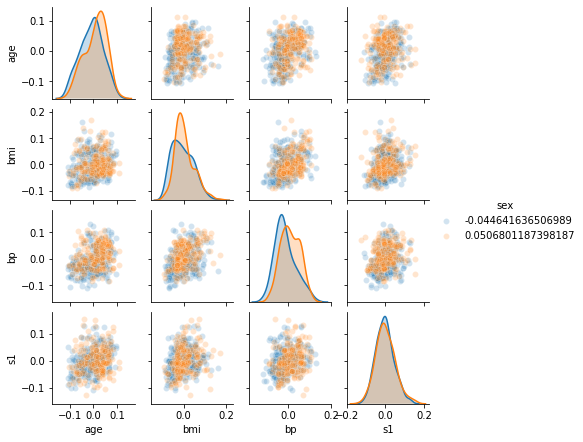

In [11]:
sns.pairplot(diabetes_df[['age', 'sex', 'bmi', 'bp', 's1']], 
             height=1.5, hue='sex', plot_kws={'alpha':.2});
#bmi: body mass index (body fat percentage)
#bp: blood pressure
#s1-s6 blood serum measurement
#target is a numerical score measuring the progression of a patient's illness

**KNN-R**

Recall that to establish the NN classification we follow the following steps:

  * Describe similarity
  * Pick several of the most-similar examples 
  * Combine the picked examples into a single answer
  
In KNN-C, to give a prediction on classification, each picked example votes equally.

Now the task at hand is to calculate a single summary value from a set of values. This value is called *statistics*. If you are trying to represent, or to summarize, the overall data set with one of these statistics, this statistic is called a summary statistic. 

In [14]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - Age
      - Sex
      - Body mass index
      - Average blood pressure
      - S1
      - S2
      - S3
      - S4
      - S5
      - S6

Note: Each of these 10 feature variables have been mean centered and scaled by the standard deviation times `n_samples` (i.e. the sum of squares of each column totals 1).

Source URL:
https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html

For more information see:
Bra

**Mean or median?**

  * Mean: average or arithmetic mean
  * Median: middle number (if the group is written in order)
  
The median is more robust measure of the center than the mean, in the case that an outlier comes to the data

In [71]:
values = np.array([1, 3, 5, 8, 11, 13, 15])
print("no outlier")
print(np.mean(values), 
      np.median(values))

values_with_outlier = np.array([1, 3, 5, 8, 11, 13, 40])
print("with outlier")
print("%5.2f" % np.mean(values_with_outlier), 
      np.median(values_with_outlier))

no outlier
8.0 8.0
with outlier
11.57 8.0


**Personalized weights**

Beyond the mean and the median, there are many possible ways to combine the nearest-neighbor answers into an answer. For instance, a weighted mean given by the weights

$$
\frac{\frac{1}{{\rm distance_i}}}{\sum_i \frac{1}{{\rm distance_i}}}.
$$

In [72]:
distances = np.array([4.0, 2.0, 2.0])
closeness = 1.0 / distances              # element-by-element division
weights = closeness / np.sum(closeness)  # normalize sum to one
weights

array([0.2, 0.4, 0.4])

In [73]:
values = np.array([4,6,8])

mean = np.mean(values)
wgt_mean = np.dot(values, weights)# scalar product of two vector (product of two matrices)

print("Mean:", mean)
print("Weighted Mean:", wgt_mean)

Mean: 6.0
Weighted Mean: 6.4


In [75]:
knn   = neighbors.KNeighborsRegressor(n_neighbors=3)
fit   = knn.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the held-back testing targets
knn_err=metrics.mean_squared_error(diabetes_test_tgt, preds)
# neighbors.KNeighborsRegressor?
print(knn_err)

4528.6296296296305


In [76]:
np.sqrt(knn_err)

67.29509365198648

In [77]:
diabetes_df['target'].max() - diabetes_df['target'].min()

321.0

The target values span about 300 units and the prediction are off in an average sense by 60 units. Nice???

**Linear regression** Drawing a line through the dots. 

The errors are the difference between the predicted results and the data points. We shall calculate a few values from the errors:

  * Sum of errors
  
  $$
  \sum^N_{i=1} (y_i - \widehat{y}_i)
  $$
  
  * Sum of squares of errors
  
  $$
  \sum^N_{i=1} |y_i - \widehat{y}_i|^2
  $$
  
  * Squre root of the sum of squared errors (distance)
  
  $$
  \sqrt{{\rm Sum\ of\ squares\ of\ errors}}
  $$
  
**Fitting with a line $y=c$**

In [79]:
def axis_helper(ax, lims):
    'clean up axes'
    ax.set_xlim(lims); ax.set_xticks([])
    ax.set_ylim(lims); ax.set_yticks([])
    ax.set_aspect('equal')

In [80]:
# our data is very simple:  two (x,y) points
D = np.array([[3,5],
              [4,2]])

# we'll take x as our "input" and y as our "output"
x,y = D[:,0], D[:,1]

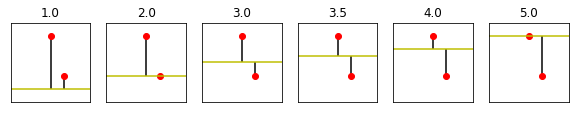

In [81]:
horizontal_lines = np.array([1, 2, 3, 3.5, 4, 5])

results = []
fig, axes = plt.subplots(1,6,figsize=(10,5))
for h_line, ax in zip(horizontal_lines, axes.flat):
    # styling
    axis_helper(ax, (0,6))
    ax.set_title(str(h_line))
    
    # plot the data
    ax.plot(x,y, 'ro')
    
    # plot the prediction line
    ax.axhline(h_line, color='y') # ax coords; defaults to 100%    

    # plot the errors
    # the horizontal line *is* our prediction; renaming for clarity
    predictions = h_line 
    ax.vlines(x, predictions, y)
    
    # calculate the error amounts and their sum-of-squares
    errors = y - predictions
    sse = np.dot(errors, errors)

    
    # put together some results in a tuple
    results.append((predictions, 
                    errors, errors.sum(), 
                    sse, np.sqrt(sse)))

In [82]:
col_labels = "Prediction", "Errors", "Sum", "SSE", "Distance"
display(pd.DataFrame.from_records(results, 
                                  columns=col_labels, 
                                  index="Prediction"))

,Errors,Sum,SSE,Distance
Prediction,,,,
1.0,"[4.0, 1.0]",5.0,17.0,4.123106
2.0,"[3.0, 0.0]",3.0,9.0,3.000000
3.0,"[2.0, -1.0]",1.0,5.0,2.236068
3.5,"[1.5, -1.5]",0.0,4.5,2.121320
4.0,"[1.0, -2.0]",-1.0,5.0,2.236068
5.0,"[0.0, -3.0]",-3.0,9.0,3.000000


**Fitting with $y = mx + b$**

We can draw a line that pointed up or down, which is a classic equation from algebra:

$$
y = mx + b.
$$

Then the closedness of this line to the points are defined by the SSE

$$
\sum_{x, y \in D} ((mx+b) - y)^2.
$$

In [83]:
def process(D, model, ax):
    # make some useful abbreviations/names
    # y is our "actual"
    x, y = D[:,0], D[:,1] 
    m, b = model
    
    # styling
    axis_helper(ax, (0,8))

    # plot the data
    ax.plot(x,y,'ro')

    # plot the prediction line
    helper_xs = np.array([0,8])
    helper_line = m * helper_xs + b
    ax.plot(helper_xs, helper_line, color='y')
    
    # plot the errors
    predictions = m * x + b
    ax.vlines(x, predictions, y)
    
    # calculate error amounts
    errors = y - predictions
    
    # tuple up the results
    sse = np.dot(errors, errors)
    return (errors, errors.sum(), sse, np.sqrt(sse))

,Raw Errors,Sum,SSE,TotDist
0,"[2, -2]",0,8,2.828427
1,"[1, -3]",-2,10,3.162278
2,"[0, -4]",-4,16,4.000000
3,"[0, -2]",-2,4,2.000000
4,"[0, 0]",0,0,0.000000


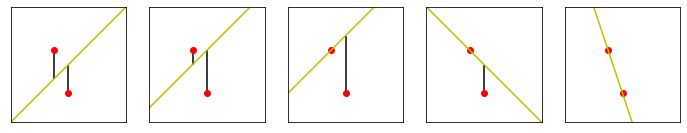

In [84]:
# our data is very simple:  two (x,y) points
D = np.array([[3,5],
              [4,2]])

#                      m   b  --> predictions = mx + b
lines_mb = np.array([[ 1,  0],
                     [ 1,  1],
                     [ 1,  2],
                     [-1,  8],
                     [-3, 14]])

col_labels = ("Raw Errors", "Sum", "SSE", "TotDist")
results = []

# note: plotting occurs in process()
fig, axes = plt.subplots(1,5,figsize=(12,6))
records = [process(D, mod, ax) for mod,ax in zip(lines_mb, axes.flat)]
df = pd.DataFrame.from_records(records, columns=col_labels)
display(df)

**More input features**

When more input features are added, instead a single slope, we have to estimate the weights describing the contribution of each feature. Then the prediction looks like

$$
y_{pred} = \sum_{features} w_f x_f = w\cdot x,
$$

which could be implemented with "sklearn" as follows:

In [85]:
lr    = linear_model.LinearRegression()
fit   = lr.fit(diabetes_train_ftrs, diabetes_train_tgt)
preds = fit.predict(diabetes_test_ftrs)

# evaluate our predictions against the unseen testing targets
metrics.mean_squared_error(diabetes_test_tgt, preds)

2866.085516606975

In general, we find no implication on the quality of fit and of the prediction from the magnitude of SSE (Why?) This depends on further study with hypothesis tests.

**Optimization: Picking the best answers**

We shall study a little bit deeper on how to pick the best weights $m$ and $b$ or in a multiple regression, the weights. It is to say that we set the knobs of the machine to their best value.

In the context of linear regression

  * with the homogeneity and non-correlated assumption on $\varepsilon$, the observation error of $y$, we have the explicit formula for the estimation of the weights (white board);
  
  * with further Gaussian assumption $\varepsilon_i\sim \mathcal{N}(0, \sigma^2)$. The estimation is indeed the maximum likelihood estimation.
  
  However, in most situation in machine learning, the explicit form of the best choice of the estimation (or the estimated parameter of the model) is difficult to find. We shall find a way to approximate the best answer. 
  
  Here are 3 guessing ways:
  
  * Random guess: Try lots of possibilities at random, take the best one;
  * Random step: Try one line - pick an $m$ and a $b$ - at random, make several random adjustments. Repeat.
  * Smart step: Try one line at random, see how it does, adjust in some smart way. Repeat.
  
  The following way is corresponding to choosing the best knobs with rigorous mathematical proof.
  
  * Calculated shortcut
  
  We have a simplest example to illustrate how we work with the 4 ways.

In [86]:
tgt = np.array([3,5,8,10,12,15])

In [87]:
# random guesses with| some constraints
num_guesses = 10
results = []
for g in range(num_guesses):
    guess = np.random.uniform(low=tgt.min(), high=tgt.max())
    total_dist = np.sum((tgt - guess)**2)
    results.append((total_dist, guess))
best_guess = sorted(results)[0][1]
best_guess

7.541257200375599

In [88]:
# use a random choice to take a hypothetical 
# step up or down:  follow it, if it is an improvement
num_steps = 100
step_size = .05

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist  = np.sum((tgt - best_guess)**2)

for s in range(num_steps):
    new_guess = best_guess + (np.random.choice([+1, -1]) * step_size)
    new_dist = np.sum((tgt - new_guess)**2)
    if new_dist < best_dist:
        best_guess, best_dist = new_guess, new_dist
print(best_guess)

8.206438858340613


In [89]:
# hypothetically take both steps (up and down)
# choose the better of the two.
# if it is an improvement, follow that step
num_steps = 1000
step_size = .02

best_guess = np.random.uniform(low=tgt.min(), high=tgt.max())
best_dist  = np.sum((tgt - best_guess)**2)
print("start:", best_guess)
for s in range(num_steps):
    # np.newaxis is needed to align the minus
    guesses = best_guess + (np.array([-1, 1]) * step_size)
    dists   = np.sum((tgt[:,np.newaxis] - guesses)**2, axis=0)
    
    better_idx = np.argmin(dists)

    if dists[better_idx] > best_dist:
        break
    
    best_guess = guesses[better_idx]
    best_dist  = dists[better_idx]
print("  end:", best_guess)

start: 9.248047637607316
  end: 8.828047637607325


Unless we get stuck in a bad spot, we should have a better shot at success than random stepping. (Question: what could be a bad spot???)

In [68]:
print("mean:", np.mean(tgt))

mean: 8.833333333333334


Question: why the mean is the best value minimizing the SSE?

In [49]:
# stand alone code
from sklearn import (datasets, neighbors, 
                     model_selection as skms,
                     linear_model, metrics)

diabetes = datasets.load_diabetes()
tts =  skms.train_test_split(diabetes.data,
                             diabetes.target, 
                             test_size=.25)
(diabetes_train, diabetes_test, 
 diabetes_train_tgt, diabetes_test_tgt) = tts

models = {'kNN': neighbors.KNeighborsRegressor(n_neighbors=3),
          'linreg' : linear_model.LinearRegression()}

for name, model in models.items():
    fit   = model.fit(diabetes_train, diabetes_train_tgt)
    preds = fit.predaict(diabetes_test)

    score = np.sqrt(metrics.mean_squared_error(diabetes_test_tgt, preds))
    print("{:>6s} : {:0.2f}".format(name,score))

   kNN : 60.79
linreg : 54.01


Ex. Write a piece of script to measure the mem consumption of the linear regression with diabetes data. 